# **A. Business Understanding: Permasalahan dan tujuan proyek**

Dataset berisi informasi mengenai identitas dan perilaku pelanggan. Tujuan dari project ini adalah untuk melakuan clustering berdasarkan perilaku pelanggan, kemudian menentukan identitas pelanggan dari cluster-cluster yang terbentuk, serta mencari produk mana saja yang paling banyak dan paling sedikit terjual untuk masing-masing cluster

# **B. ANALYTIC APPROACH**

Pendekatan analitik yang dikakuan pada penelitian ini adalah pendekatan clustering yang digabungkan dengan pendekatan asosiasi menggunakan metode apriori

# **C. DATA REQUIREMENTS**

Kebutuhan data yang kami identifiksi adalah sebuah dataset yang berisi tentang perilaku dan identitas dari pelanggan-pelanggan, dimana data perilaku akan dibutuhkan untuk melakukan clustering, data identitas digunakan untuk menganalisa komposisi pelanggan dari cluster yang terbentuk.

# **D. DATA COLLECTION**

## **1. DOWNLOAD DATASET**

In [36]:
import pandas as pd
import numpy as np
#mendownload dataset
!wget https://raw.githubusercontent.com/RafiIndra/Dataset/main/marketing_campaign.csv

--2023-04-04 10:39:35--  https://raw.githubusercontent.com/RafiIndra/Dataset/main/marketing_campaign.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220188 (215K) [text/plain]
Saving to: ‘marketing_campaign.csv.3’

marketing_campaign. 100%[===================>] 215.03K  --.-KB/s    in 0.03s   

2023-04-04 10:39:35 (7.50 MB/s) - ‘marketing_campaign.csv.3’ saved [220188/220188]



## **2. READ AND STORE DATASET**

In [37]:
#membaca dataset dan menyimpannya pada variabel df
df = pd.read_csv("marketing_campaign.csv", sep="	")
#membaca 5 baris pertama dari df
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### **DATA DICTIONARY**
<table>
  <tr>
    <th>no</th>
    <th>Column</th>
    <th>Types</th>
    <th>Desc</th>
  </tr>
  <tr>
    <td>1</td>
    <td>ID</td>
    <td>int64</td>
    <td>Customer's unique identifier</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Year_Birth</td>
    <td>int64</td>
    <td>Customer's birth year</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Education</td>
    <td>object</td>
    <td>Customer's education level</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Marital_Status</td>
    <td>object</td>
    <td>Customer's marital status</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Income</td>
    <td>float64</td>
    <td>Customer's yearly household income</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Kidhome</td>
    <td>int64</td>
    <td>Number of children in customer's household</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Teenhome</td>
    <td>int64</td>
    <td>Number of teenagers in customer's household</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Dt_Customer</td>
    <td>int64</td>
    <td>Date of customer's enrollment with the company</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Recency</td>
    <td>int64</td>
    <td>Number of days since customer's last purchase</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Complain</td>
    <td>int64</td>
    <td>1 if the customer complained in the last 2 years, 0 otherwise</td>
  </tr>
  <tr>
    <td>11</td>
    <td>MntWines</td>
    <td>int64</td>
    <td>Amount spent on wine in last 2 years</td>
  </tr>
  <tr>
    <td>12</td>
    <td>MntFruits</td>
    <td>int64</td>
    <td>Amount spent on fruit in last 2 years</td>
  </tr>
  <tr>
    <td>13</td>
    <td>MntMeatProducts</td>
    <td>int64</td>
    <td>Amount spent on meat in last 2 years</td>
  </tr>
  <tr>
    <td>14</td>
    <td>MntFishProducts</td>
    <td>int64</td>
    <td>Amount spent on fish in last 2 years</td>
  </tr>
  <tr>
    <td>15</td>
    <td>MntSweetsProducts</td>
    <td>int64</td>
    <td>Amount spent on sweets in last 2 years</td>
  </tr>
  <tr>
    <td>16</td>
    <td>MntGoldProds</td>
    <td>int64</td>
    <td>Amount spent on gold in last 2 years</td>
  </tr>
  <tr>
    <td>17</td>
    <td>AcceptedCmp1</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the 1st campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>18</td>
    <td>AcceptedCmp2</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the 2nd campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>19</td>
    <td>AcceptedCmp3</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the 3rd campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>20</td>
    <td>AcceptedCmp4</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the 4th campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>21</td>
    <td>AcceptedCmp5</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the 5th campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>22</td>
    <td>Response</td>
    <td>int64</td>
    <td>1 if customer accepted the offer in the last campaign, 0 otherwise</td>
  </tr>
  <tr>
    <td>23</td>
    <td>NumWebPurchases</td>
    <td>int64</td>
    <td>Number of purchases made through the company’s website</td>
  </tr>
  <tr>
    <td>24</td>
    <td>NumCatalogPurchases</td>
    <td>int64</td>
    <td>Number of purchases made using a catalogue</td>
  </tr>
  <tr>
    <td>25</td>
    <td>NumStorePurchases</td>
    <td>int64</td>
    <td>Number of purchases made directly in stores</td>
  </tr>
  <tr>
    <td>26</td>
    <td>NumWebVisitsMonth</td>
    <td>int64</td>
    <td>Number of visits to company’s website in the last month</td>
  </tr>
</table>

# **E. DATA UNDERSTANDING**

## **3. EXPLORATORY DATA ANALYSIS**

<BarContainer object of 5 artists>

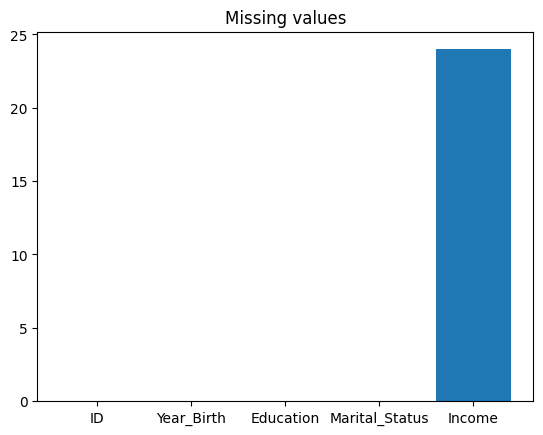

In [38]:
import matplotlib.pyplot as plt
plt.title("Missing values")
#mencari missing values menggunakan bar plot
plt.bar(df.columns[0:5], df.iloc[:, 0:5].isna().sum())

Ditemukan bahwa terdapat 24 missing values pada kolom "Income"

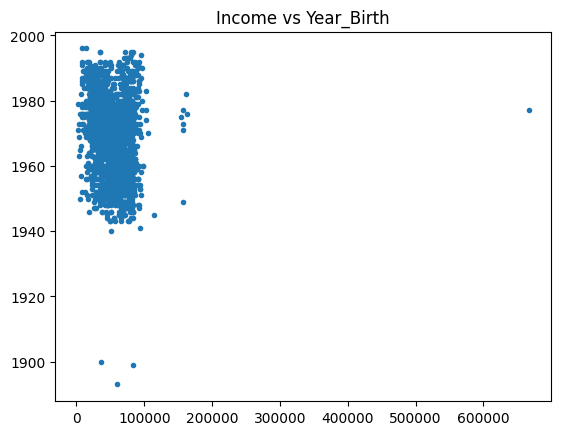

In [39]:
plt.title("Income vs Year_Birth")
#mencari outlier menggunakan scatter plot pada variabel Income dan year_birth
plt.plot(df["Income"], df["Year_Birth"], ".")

dietmukan outlier untuk "Income" > 600000 dan "Year_Birth" < 1920

<Axes: xlabel='Marital_Status', ylabel='count'>

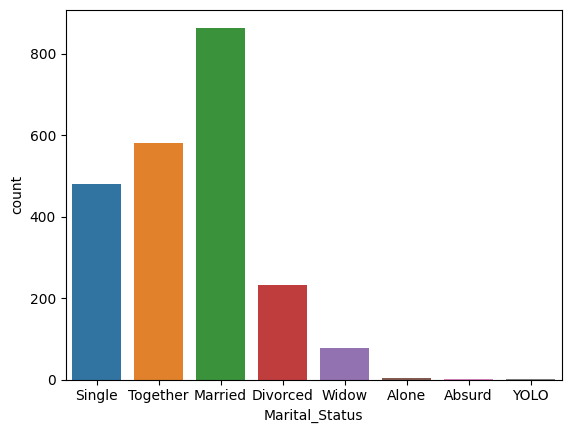

In [40]:
import seaborn as sns
#memvisualisasikan kolom "Marital_Status" menggunakan countplot untuk melihat nilai kolom
sns.countplot(x = df["Marital_Status"])

Ditemukan value yang tidak relevan:<br>
1. "Alone"
2. "Absurd"
3. "Yolo"



<Axes: xlabel='Education', ylabel='count'>

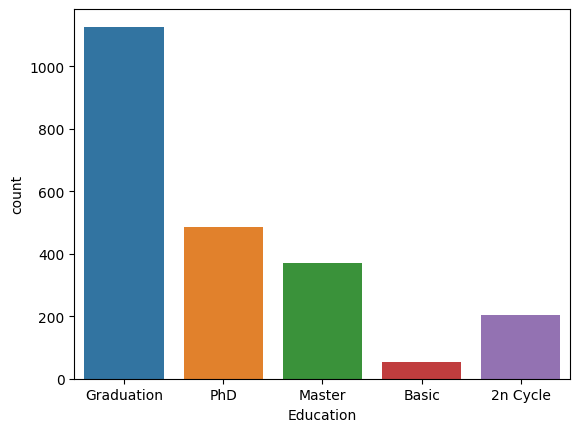

In [41]:
#memvisualisasikan kolom "Education" menggunakan countplot untuk melihat nilai kolom
sns.countplot(x = df["Education"])

ditemukan values yang tidak relevan:
1. "Basic"
2. "2n Cycle"

# **F. DATA PREPRARATION**

## **F. DATA CLEANING**

In [42]:
#drop outlier
df.drop(df[df['Year_Birth'] <= 1900].index, inplace = True)
#mengganti nama kolom
df["Education"] = df["Education"].replace({"2n Cycle":"Master", "Graduation":"Bachelor", "Basic":"Undergraduate"})
df["Marital_Status"] = df["Marital_Status"].replace({'Together':"Taken", "Divorced":"Single", "Widow":"Single", 
                                                     "Alone":"Single", "Absurd":"Single", "YOLO":"Single", "Married":"Taken"})
#drop missing values
df = df.dropna()
#drop kolom yang tidak relevan
df = df.drop(columns = ["Z_CostContact", "Z_Revenue"])
#drop outlier pada kolom Income
df.drop(df[df["Income"] > 600000].index, inplace = True)

#mengganti nama kolom
df = df.rename(columns = {"MntWines":"Wine", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweet",
                          "MntGoldProds":"Gold", "Response":"Campaign6", "AcceptedCmp1":"Campaign1", "AcceptedCmp2":"Campaign2", "AcceptedCmp3":"Campaign3",
                          "AcceptedCmp4":"Campaign4", "AcceptedCmp5":"Campaign5", "MntFruits":"Fruit"})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Campaign6
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Bachelor,Taken,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Bachelor,Taken,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Taken,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Taken,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Taken,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Bachelor,Single,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Taken,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


berdasarkan feature exploration yang telah dilakukan, maka data celaning yang dilakukan adalah sebagai berikut:



*   Remove outlier untuk kolom (["Income"]>600000)
*   Remove outlier untuk kolom (["Year_Birth"] <= 1900)
*   Renaming values untuk kolom ["Education"]
*   Drop missing values yang terdapat pada kolom ["Income"]
*   Renaming values untuk kolom ["Marital_Status"]
*   Drop kolom ["Z_CostContact"] dan ["Z_Revenue"]







## 5. FEATURE ENGINEERING

In [43]:
#membuat kolom totalPurchase dengan menjumlahkan seluruh kolom pembelian
df["totalPurchase"] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
#membuat kolom totalSpend dengan menjumlahkan pengeluaran
df["totalSpend"] = df['Wine'] + df['Meat'] + df['Gold'] + df['Sweet'] + df["Fish"] + df["Fruit"]
#membuat kolom age dengan mengurangi 2022 dengan kolom year_birth
df["Age"] = 2022 - df["Year_Birth"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Campaign6,totalPurchase,totalSpend,Age
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1,25,1617,65
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,0,6,27,68
2,4141,1965,Bachelor,Taken,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,21,776,57
3,6182,1984,Bachelor,Taken,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,0,8,53,38
4,5324,1981,PhD,Taken,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,0,19,422,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Taken,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,0,18,1341,55
2236,4001,1946,PhD,Taken,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,0,22,444,76
2237,7270,1981,Bachelor,Single,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,0,19,1241,41
2238,8235,1956,Master,Taken,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,0,23,843,66


dibuat kolom baru sebagai berikut:
1. totalPurchase: total berapa kali melakukan pembelian
2. totalSpend: total pengeluaran untuk pembelian
3. age: umur

## **6. BINNING**

<Axes: xlabel='totalSpend', ylabel='count'>

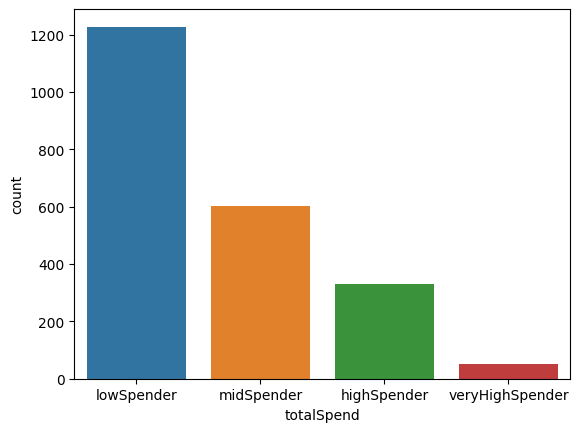

In [44]:
import seaborn as sns
#inisialisasi label
label = ['lowSpender', "midSpender", "highSpender", "veryHighSpender"]
#membagi totalSpend berdasarkan rentang yang ditentukan
df['totalSpend'] = pd.cut(df['totalSpend'], [0, 500, 1250, 2000, 3000], labels=label);
#memvisualisasikan kolom setelah binning
sns.countplot(x= df["totalSpend"])

<Axes: xlabel='Age', ylabel='count'>

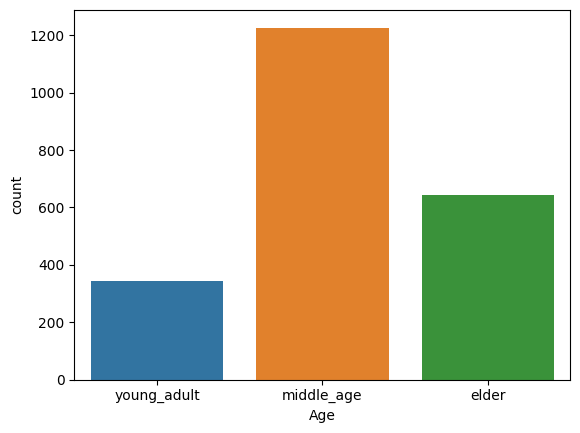

In [45]:
#inisialisasi label
label = ['young_adult', "middle_age", "elder"]
#membagi kolom age berdasarkan rentang yang ditentukan
df['Age'] = pd.cut(df['Age'], [0, 40, 60, 100], labels=label);
#visualisasi kolom setelah binning
sns.countplot(x= df["Age"])

<Axes: xlabel='Income', ylabel='count'>

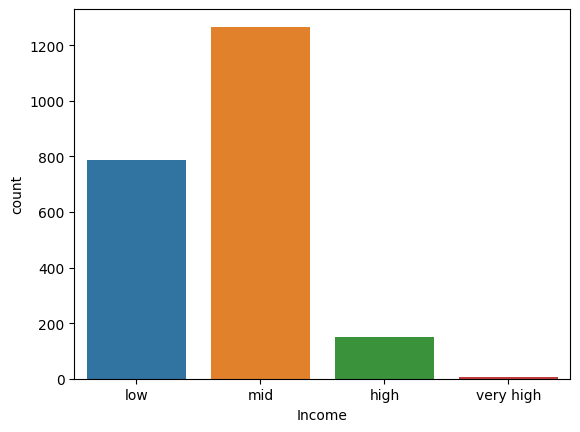

In [46]:
#inisialisasi label
label = ['low', "mid", "high", "very high"]
#membagi kolom income menjadi 4 rentang yang sama besar
df['Income'] = pd.cut(df['Income'], bins=4, labels=label);
#visualisasi kolom setelah binning
sns.countplot(x= df["Income"])

##7. MENGAMBIL KOLOM PERILAKU

In [47]:
#mengambil kolom perilaku dan disimpan paa variabel df_behavior
df_behavior = df.iloc[:, 8:-2]
df_behavior

,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Campaign6,totalPurchase
0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,25
1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,6
2,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,21
3,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,8
4,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,18
2236,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,22
2237,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,19
2238,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,23


## METODE CLUSTERING YANG DIPILIH

metode clustering yang kami pilih berasal dari 3 jenis clustering yang berbeda, yaitu K-Means dari centroid-based clustering, DBSCAn dari density based clustering, dan Agglomerative clustering. Tujuannya adalah agar dapat membandingkan jenis clustering mana yang paling baik untuk digunakan.

# **G. MODELING**

##8. METODE USULAN: KMEANS

### Menentukan jumlah cluster dengan Elbow Method

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Knee:  3


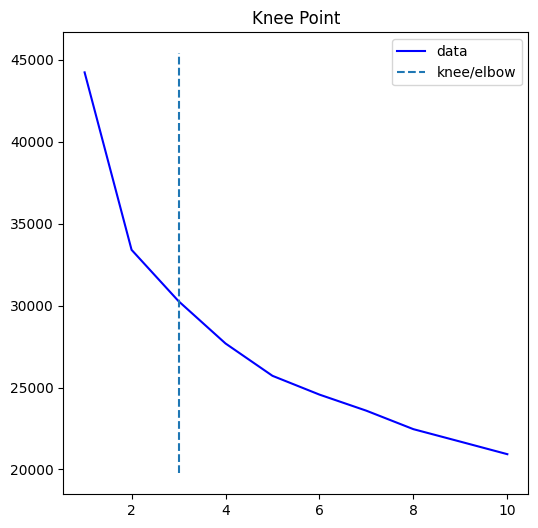

In [48]:
#import library
import matplotlib.pyplot as plt
! pip install kneed
import kneed
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#menyamakan skala data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_behavior)

#inisialisasi list untuk menyimpan error
sse = []
#melakukan clustering dengan jumlah cluster 1-10
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
  kmeans.fit(scaled_features)
  #menyimpan error
  sse.append(kmeans.inertia_)

#menggunakan library kneelocator untuk mencari knee pada elbow method
kneedle = kneed.KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
knee_point = kneedle.knee
print('Knee: ', knee_point)
kneedle.plot_knee()

Melakukan clustering dengan metode K-Means membutuhkan inisialisasi jumlah cluster yang ingin dibentuk. Untuk menemukan jumlah cluster yang optimal, salah satu metode yang bisa digunakan adalah dengan menggunakan "Elbow Method". Berdasarkan Elbow Method yang telah dilakukan diatas, maka jumlah cluster yang optimal untuk digunakan adalah sebanyak 3 cluster

### Melakukan clustering K-Means dengan jumlah cluster = 3

In [49]:
#inisialisasi model
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

#inisialisasi dictionary untuk menyimpan shillouette score
score_compare = {}
#fit dataframe
kmeans.fit(scaled_features)
#mengambil label
kmeansClusters=kmeans.labels_
#menghitung shillouette score
score = silhouette_score(scaled_features, kmeansClusters)
#menyimpan shillouette score pada dictionary
score_compare.update({"kmeans": score})
print("shillouette score: ", score)
print("Cluster: ", np.unique(kmeansClusters))

shillouette score:  0.28613872076840513
Cluster:  [0 1 2]


##9. METODE PEMBANDING 1: DBSCAN

DBSCAN atau "Density-based spatial clustering of applications with noise" adalah salah satu metode clustering yang berbasis kerapatan atau *density based*. Metode ini tidak membutuhkan inisialisasi jumlah cluster, hanya membutuhkan inisialisasi "min_pts", yaitu jumlah minimal data didalam sebuah cluster, dan inisialisasi "eps" yaitu jarak maksimal antara titik-titik dalam sebuah cluster.
<br><br>
*rule of thumb* untuk estimasi parameter dalam DBSCAN adalah sebagai berikut:
<br>
1. min_pts gunakan 2(jumlah kolom)
2. eps gunakan jarak antara min_pts

maka, pada percobaan kali ini digunakan 2(20) untuk min_pts

Knee:  2144


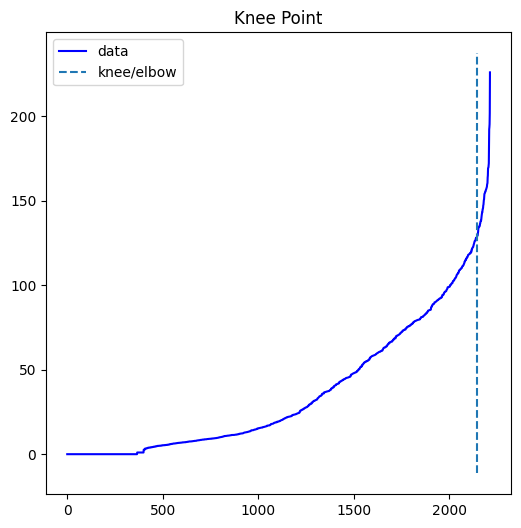

In [50]:
#import library
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
#inisialisasi model NN
neighbors = NearestNeighbors(n_neighbors=40)
#melakukan fitting model
neighbors_fit = neighbors.fit(df_behavior)
distances, indices = neighbors_fit.kneighbors(df_behavior)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
#mencari knee point pada elbow method dengan kneelocator
kneedle = kneed.KneeLocator(range(1, 2213), distances, curve="convex")
knee_point = kneedle.knee
print('Knee: ', knee_point)
kneedle.plot_knee()

In [51]:
#import library
from sklearn.cluster import DBSCAN
#inisialisasi model
dbscan = DBSCAN(eps=2144, min_samples=40).fit(df_behavior)
#mengambil label
dbscanClusters = dbscan.labels_
#menyimpan nan sebagai shillouette score
score_compare.update({"dbscan": np.nan})
print("Cluster: ", np.unique(dbscanClusters))

Cluster:  [0]


hasil yang ditemukan adalah hanya 1 cluster yang dibentuk oleh DBSCAN. Karena DBSCAN menggunakan kerapatan sebagai dasar dari clustering, maka hasil tersebut menunjukkan bahwa data yang digunakan pada penelitian ini memiliki kerapatan yang tinggi, sehingga DBSCAN tidak dapat menghasilkan performa yang optimal

##10. METODE PEMBANDING 2: AGGLOMERATIVE CLUSTERING



Agglomerative Clustering adalah metode clustering dimana setiap titik merupakan cluster tersendiri, kemudian dilakukan penggabungan atas cluster-cluster yang memiliki kemiripan, sehingga membuat cluster baru yang lebih besar. Metode ini membutuhkan inisialisasi jumlah cluster. Salah satu metode untuk mencari jumlah cluster optimal pada metode ini adalah dengan menggunakan diagram dendogram

## Membuat dendogram

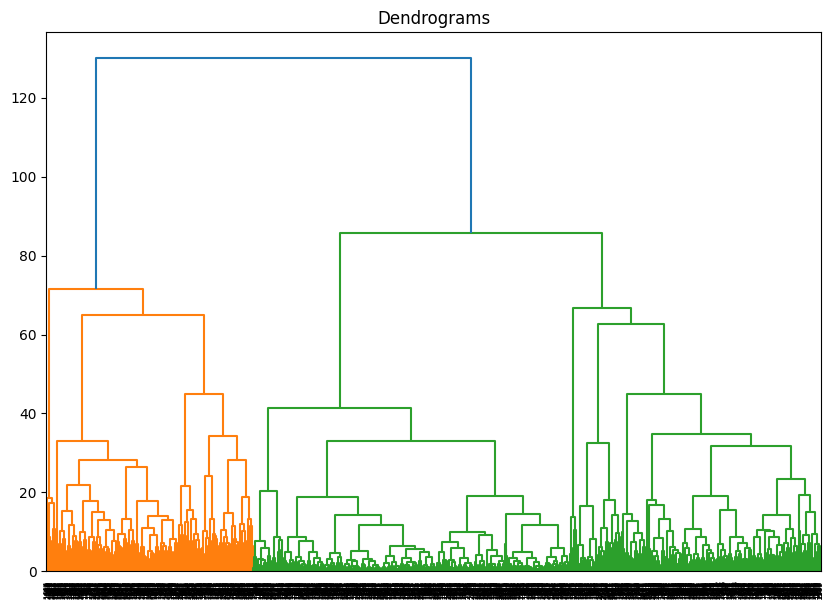

In [52]:
#import library
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
#membuat dendogram dengan library scipy cluster hierarcy
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))

berdasarkan warna pada dendogram (biru, oranye, dan hijau), maka dapat disimpulkan bahwa jumlah cluster optimal untuk dibentuk adalah sebanyak 3 cluster. Kemudian dapat dilakukan clustering menggunakan agglomerative clustering dengan jumlah cluster sebanyak 3

## Melakukan clustering dengan jumlah cluster = 3

In [53]:
#import library
from sklearn.cluster import AgglomerativeClustering
#inisialisasi model dan fitting
wClusters = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(scaled_features)
#menghitung shilloutte score
score = silhouette_score(df_behavior, wClusters)
#menyimpan shillouette score
score_compare.update({"Agglomerative": score})
print("shillouette score: ", score)
print("Cluster: ", np.unique(wClusters))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


shillouette score:  0.2692888124969939
Cluster:  [0 1 2]


#**H. EVALUATION**

##11. PERBANDINGAN CLUSTERING

<BarContainer object of 3 artists>

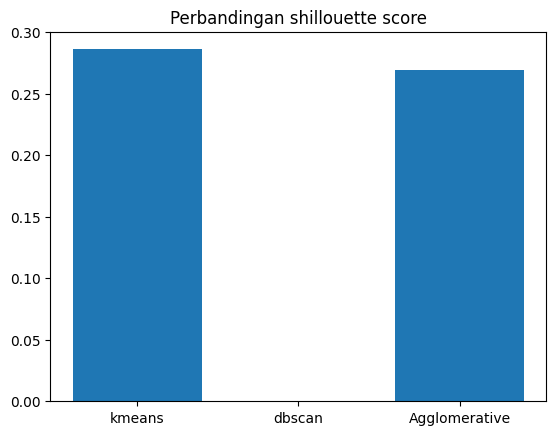

In [54]:
#visualisasi shillouette score
plt.title("Perbandingan shillouette score")
plt.bar(score_compare.keys(), score_compare.values())

dari ketiga metode yang diteliti, maka perbandingan evaluasi dengan menggunakan shillouette coefficient adalah sebagai berikut:

1.   K-Means: 0.28
2.   DBSCAN: tidak dapat dihitung karena tidak ada cluster yang terbentuk
3.   Agglomerative: 0.26

Shillouette Coefficient memiliki rentang dari -1 sampai dengan 1, dimana semakin besar skornya, maka semakin baik cluster yang terbentuk. Maka, berdasarkan shillouette coefficient yang didapat, K-Means merupakan metode yang terbaik, sehingga untuk tahapan berikutnya, cluster dari metode K-Means lah yang akan dipakai.



## Membuat kolom cluster pada dataframe, dan memasukkan nilai cluster dari K-Means

In [55]:
#insert cluster ke df
df.insert(0, "Cluster", kmeansClusters, True)
df

,Cluster,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Campaign6,totalPurchase,totalSpend,Age
0,2,5524,1957,Bachelor,Single,mid,0,0,04-09-2012,58,...,0,0,0,0,0,0,1,25,highSpender,elder
1,1,2174,1954,Bachelor,Single,mid,1,1,08-03-2014,38,...,0,0,0,0,0,0,0,6,lowSpender,elder
2,2,4141,1965,Bachelor,Taken,mid,0,0,21-08-2013,26,...,0,0,0,0,0,0,0,21,midSpender,middle_age
3,1,6182,1984,Bachelor,Taken,low,1,0,10-02-2014,26,...,0,0,0,0,0,0,0,8,lowSpender,young_adult
4,2,5324,1981,PhD,Taken,mid,1,0,19-01-2014,94,...,0,0,0,0,0,0,0,19,lowSpender,middle_age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,10870,1967,Bachelor,Taken,mid,0,1,13-06-2013,46,...,0,0,0,0,0,0,0,18,highSpender,middle_age
2236,1,4001,1946,PhD,Taken,mid,2,1,10-06-2014,56,...,0,0,0,1,0,0,0,22,lowSpender,elder
2237,2,7270,1981,Bachelor,Single,mid,0,0,25-01-2014,91,...,0,1,0,0,0,0,0,19,midSpender,middle_age
2238,2,8235,1956,Master,Taken,mid,0,1,24-01-2014,8,...,0,0,0,0,0,0,0,23,midSpender,elder


## Melihat distribusi cluster

<Axes: xlabel='Cluster', ylabel='count'>

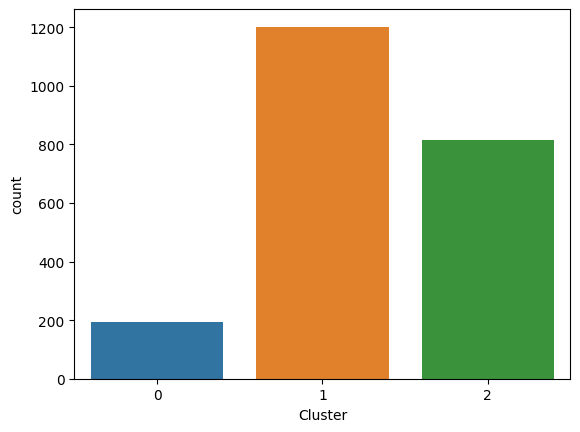

In [56]:
sns.countplot(x=df["Cluster"])

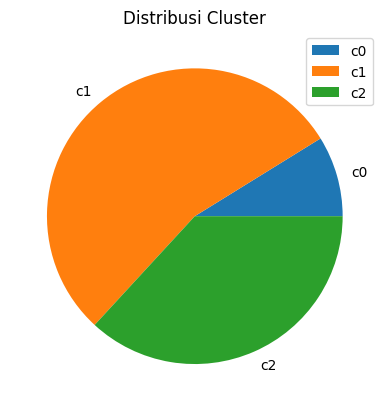

In [57]:
#menghitung banyak row tiap cluster
c0 = df.loc[df["Cluster"]==0].shape[0]
c1 = df.loc[df["Cluster"]==1].shape[0]
c2 = df.loc[df["Cluster"]==2].shape[0]
#simpan banyak row dalam array numpy
y = np.array([c0, c1, c2])
#visualisasi cluster
plt.title("Distribusi Cluster")
plt.pie(y, labels=["c0", "c1", "c2"])
plt.legend()
plt.show() 

##12. ANALISIS CLUSTER

## Meneliti income setiap cluster

<BarContainer object of 4 artists>

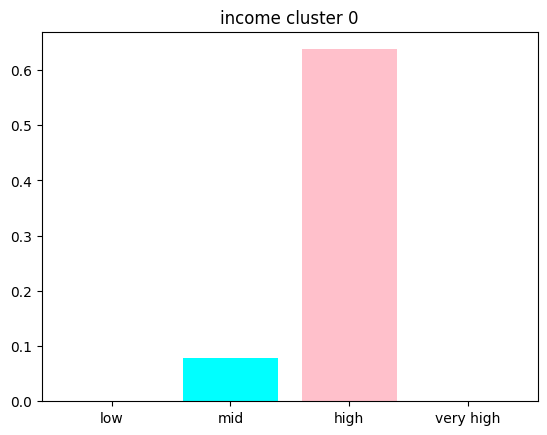

In [58]:
#mengambil seluruh data cluster 0
tes = df.loc[df["Cluster"] == 0]
#inisialisasi label
income = ["low", "mid", "high", "very high"]
#inisialisasi list persen
percent = []
#hitung persentase setiap label yang masuk kedalam cluster 0
for i in income:
  percent.append(tes.loc[tes["Income"]== i].shape[0] / df.loc[df["Income"]== i].shape[0])
#visualisasi income cluster 0
plt.title("income cluster 0")
plt.bar(income, percent, color=["red", "cyan", "pink", "orange"])

Untuk income di cluster 0 mayoritas untuk kategori high

<BarContainer object of 4 artists>

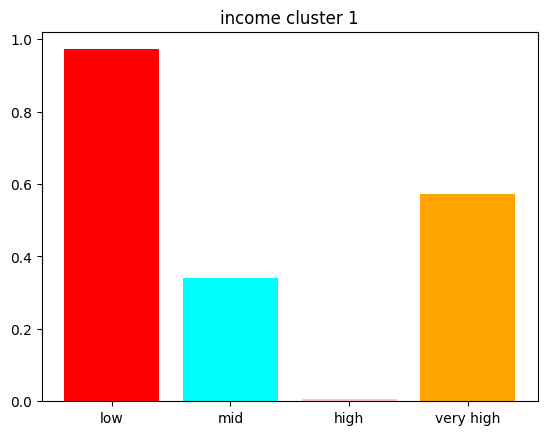

In [59]:
#ambil seluruh data cluster 1
tes = df.loc[df["Cluster"] == 1]
#inisialisasi label
income = ["low", "mid", "high", "very high"]
#inisialisasi persen
percent = []
#hitung persentase seluruh label yang masuk kedalam cluster 1
for i in income:
  percent.append(tes.loc[tes["Income"]== i].shape[0] / df.loc[df["Income"]== i].shape[0])
#visualisasi income cluster 1
plt.title("income cluster 1")
plt.bar(income, percent, color=["red", "cyan", "pink", "orange"])

Untuk Income di cluster 1 mayoritas diisi oleh kategori low disusul dengan kategori mid dan very high

<BarContainer object of 4 artists>

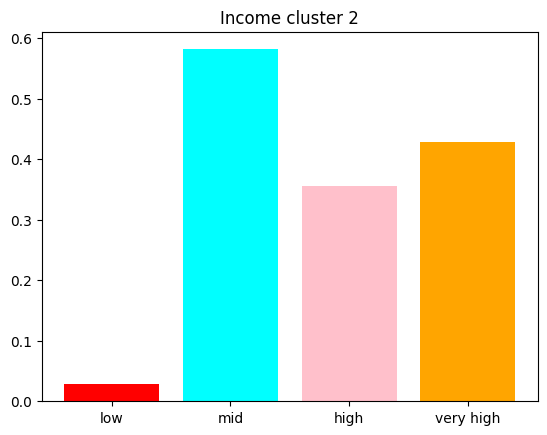

In [60]:
#ambil seluruh cluster 2
tes = df.loc[df["Cluster"] == 2]
#inisialisasi label
income = ["low", "mid", "high", "very high"]
#inisialisasi persen
percent = []
#hitung persentase seluruh label yang masuk kedalam cluster 1
for i in income:
  percent.append(tes.loc[tes["Income"]== i].shape[0] / df.loc[df["Income"]== i].shape[0])
#visualisasi income cluster 2
plt.title("Income cluster 2")
plt.bar(income, percent, color=["red", "cyan", "pink", "orange"])

Untuk income di cluster 2 mayoritas berisi dari kategori mid dan disusul dengan kategori high dan very high

## Meneliti umur setiap cluster

<BarContainer object of 3 artists>

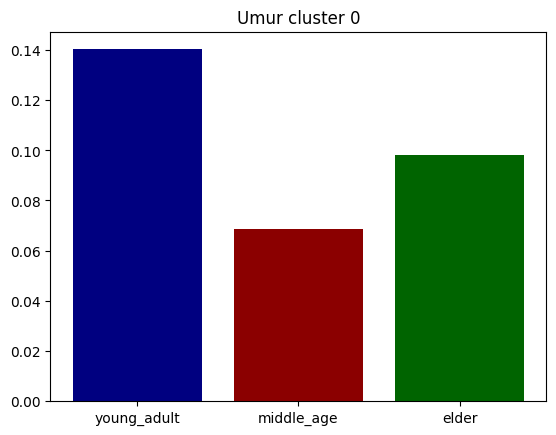

In [61]:
tes = df.loc[df["Cluster"] == 0]

age = ["young_adult", "middle_age", "elder"]
percent = []
for i in age:
  percent.append(tes.loc[tes["Age"]== i].shape[0] / df.loc[df["Age"]== i].shape[0])

plt.title("Umur cluster 0")
plt.bar(age, percent, color=["navy", "darkRed", "darkGreen", "orange"])

Untuk umur dari dari cluster 0 diisi dengan mayoritas kategori young_adult dan disusul dengan elder dan middle_age

<BarContainer object of 3 artists>

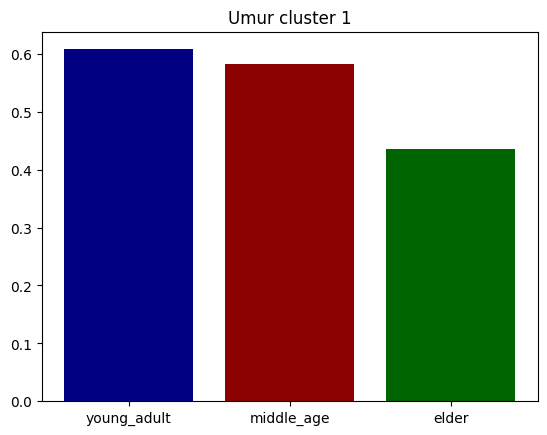

In [62]:
tes = df.loc[df["Cluster"] == 1]

age = ["young_adult", "middle_age", "elder"]
percent = []
for i in age:
  percent.append(tes.loc[tes["Age"]== i].shape[0] / df.loc[df["Age"]== i].shape[0])

plt.title("Umur cluster 1")
plt.bar(age, percent, color = ["navy", "darkRed", "darkGreen", "orange"])

Untuk umur di cluster 1 diisi dengan mayoritas dari kategori young_adult, middle_age, dan elder

<BarContainer object of 3 artists>

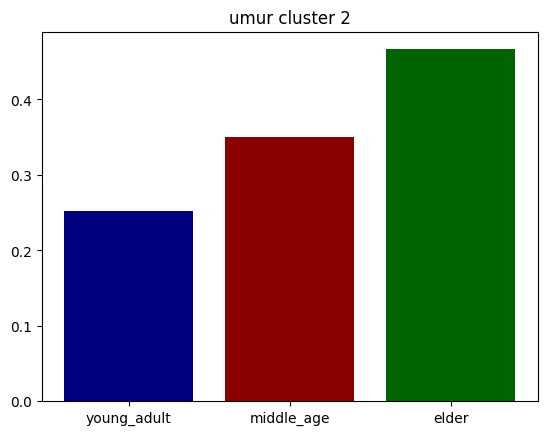

In [63]:
tes = df.loc[df["Cluster"] == 2]

age = ["young_adult", "middle_age", "elder"]
percent = []
for i in age:
  percent.append(tes.loc[tes["Age"]== i].shape[0] / df.loc[df["Age"]== i].shape[0])

plt.title("umur cluster 2")
plt.bar(age, percent, color = ["navy", "darkRed", "darkGreen", "orange"])

U

Untuk umur di cluster 2 mayoritas diisi dengan kategori elder dan disusul dengan middle_age dan young_adult

## Meneliti total pengeluaran setiap cluster 

<BarContainer object of 4 artists>

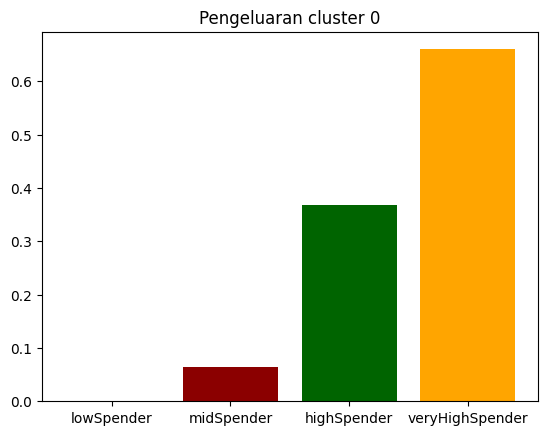

In [64]:
tes = df.loc[df["Cluster"] == 0]

spend = ["lowSpender", "midSpender", "highSpender", "veryHighSpender"]
percent = []
for i in spend:
  percent.append(tes.loc[tes["totalSpend"]== i].shape[0] / df.loc[df["totalSpend"]== i].shape[0])

plt.title("Pengeluaran cluster 0")
plt.bar(spend, percent, color = ["navy", "darkRed", "darkGreen", "orange"])

Untuk Pengeluaran di cluster 0 diisi dengan mayoritas kategori  very high_spender disusul dengan highspender

<BarContainer object of 4 artists>

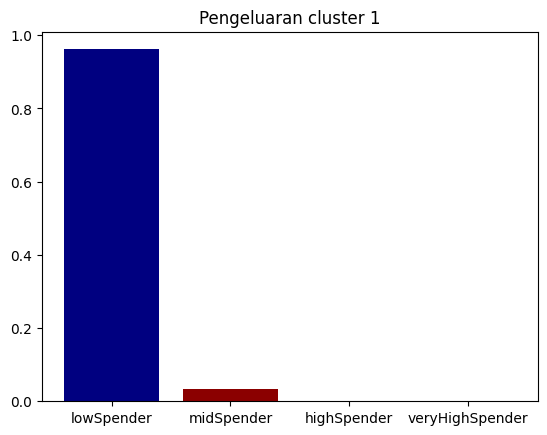

In [65]:
tes = df.loc[df["Cluster"] == 1]

spend = ["lowSpender", "midSpender", "highSpender", "veryHighSpender"]
percent = []
for i in spend:
  percent.append(tes.loc[tes["totalSpend"]== i].shape[0] / df.loc[df["totalSpend"]== i].shape[0])

plt.title("Pengeluaran cluster 1")
plt.bar(spend, percent, color = ["navy", "darkRed", "darkGreen", "orange"])

Untuk pengeluaran di cluster 1 diisi dengan mayoritas pengeluaran kategori lowSpender

<BarContainer object of 4 artists>

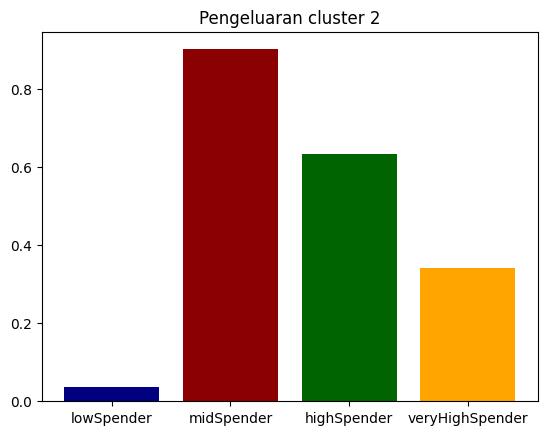

In [66]:
tes = df.loc[df["Cluster"] == 2]

spend = ["lowSpender", "midSpender", "highSpender", "veryHighSpender"]
percent = []
for i in spend:
  percent.append(tes.loc[tes["totalSpend"]== i].shape[0] / df.loc[df["totalSpend"]== i].shape[0])

plt.title("Pengeluaran cluster 2")
plt.bar(spend, percent, color = ["navy", "darkRed", "darkGreen", "orange"])

Untuk pengeluaran cluster 2 diisi dengan mayoritas kategori midSpender kemudian disusul dengan highspender dan veryhighspender

##13. KESIMPULAN CLUSTER

Kesimpulan yang didapat dari masing masing cluster adalah sebagai berikut:


1. Cluster 0: Pelanggan dengan jumlah belanja yang tinggi-sangat tinggi. Berisi mayoritas pelanggan dengan pemasukkan tinggi, dan sebagian kecil dari pelanggan dengan pemasukkan rendah. Mayoritas umur young adult.

2.   Cluster 1: Pelanggan dengan jumlah belanja yang rendah. Berisi mayoritas pelanggan dengan pemasukkan rendah, dan sebagian kecil dari pelanggan dengan pemasukkan menengah dan sangat tinggi. Tidak rentang umur yang mencolok pada cluster ini.

3. Cluster 2: Pelanggan dengan jumlah belanja yang menengah-tinggi, dan sebagian kecil dari jumlah belanja yang sangat tinggi. Berisi mayoritas pelanggan dengan pemasukan yang menengah, dan sebagian dari pemasukan tinggi-sangat tinggi. dengan mayoritas umur lansia atau 60+



#**I. MODELING APRIORI METHOD**

Apriori adalah salah satu algoritma pada data mining untuk mencari itemset. Metode ini dapat digunakan untuk melihat produk apa saja yang sering dibeli secara bersamaan oleh pelanggan. Pada penelitian ini, metode apriori digunakan untuk melihat karakteristik pembelian pelanggan dan produk yang paling banyak terjual untuk masing-masing cluster

## Binning untuk setiap pembelian produk

untuk setiap produk, dilakukan pengelompokkan menjadi "lowBuyer" yaitu pelanggan dengan jumlah pembelian produk rendah, "mediumBuyer" untuk pelanggan dengan jumlah pembelian produk menengah, dan "highBuyer" untuk pelanggan dengan jumlah pembelian produk tinggi

<Axes: xlabel='Fruit', ylabel='count'>

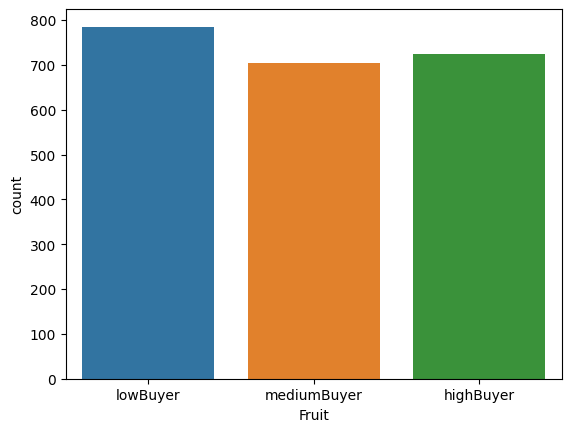

In [67]:
#inisialisasi label
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
#membagi kolom buah menjadi 3 bagian dengan rentang sama besar
df['Fruit'] = pd.qcut(df['Fruit'], 3, labels=label)
sns.countplot(x= df["Fruit"])

<Axes: xlabel='Wine', ylabel='count'>

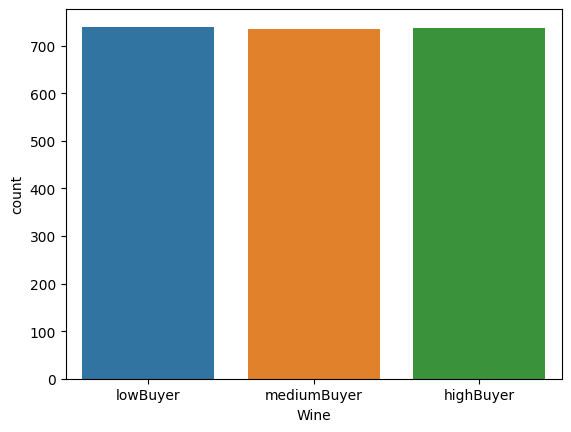

In [68]:
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
#membagi kolom anggur menjadi 3 bagian dengan rentang sama besar
df['Wine'] = pd.qcut(df['Wine'], 3, labels=label);
sns.countplot(x= df["Wine"])

<Axes: xlabel='Meat', ylabel='count'>

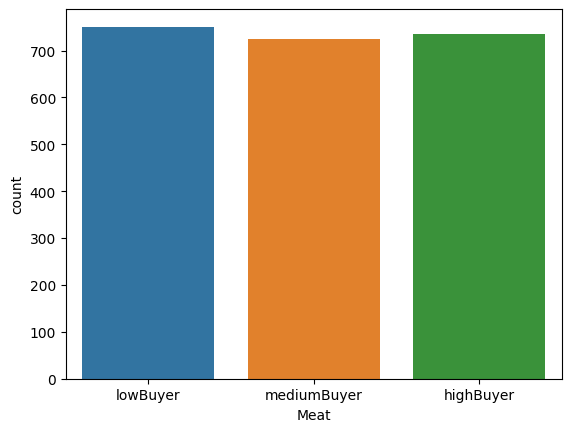

In [69]:
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
#membagi kolom daging menjadi 3 bagian dengan rentang sama besar
df['Meat'] = pd.qcut(df['Meat'], 3, labels=label);
sns.countplot(x= df["Meat"])

<Axes: xlabel='Fish', ylabel='count'>

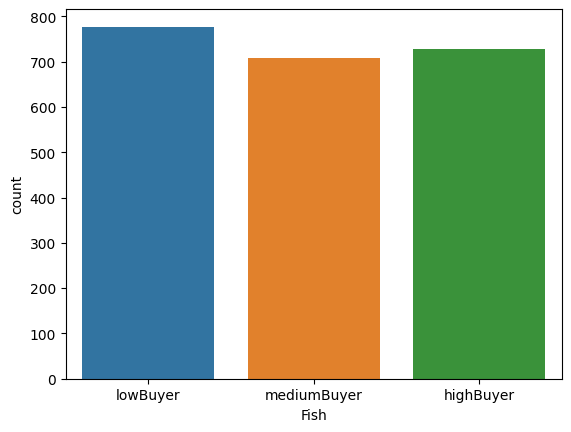

In [70]:
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
#membagi kolom ikan menjadi 3 bagian dengan rentang sama besar
df['Fish'] = pd.qcut(df['Fish'], 3, labels=label);
sns.countplot(x= df["Fish"])

<Axes: xlabel='Sweet', ylabel='count'>

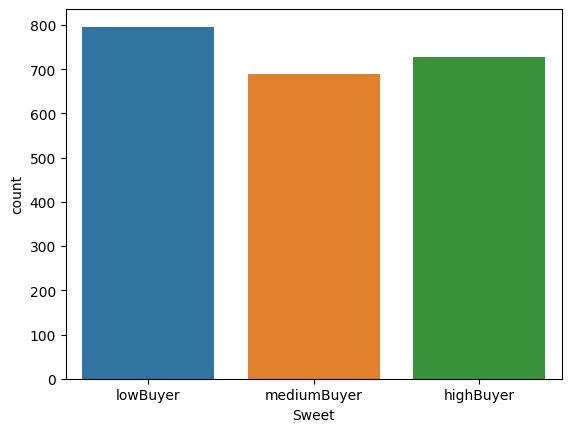

In [71]:
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
#membagi kolom manisan menjadi 3 bagian dengan rentang sama besar
df['Sweet'] = pd.qcut(df['Sweet'], 3, labels=label);
sns.countplot(x= df["Sweet"])

<Axes: xlabel='Gold', ylabel='count'>

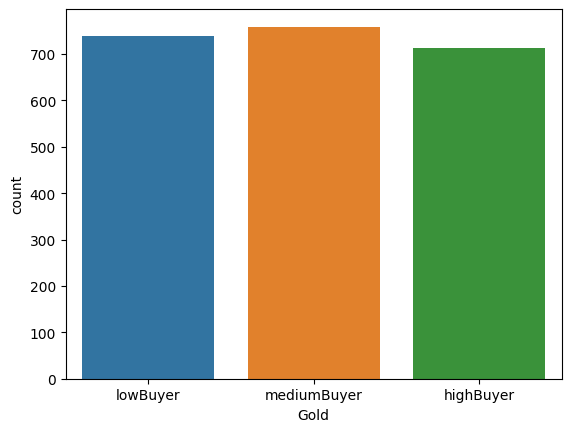

In [72]:
label = ['lowBuyer', "mediumBuyer", "highBuyer"]
#membagi kolom emas menjadi 3 bagian dengan rentang sama besar
df['Gold'] = pd.qcut(df['Gold'], 3, labels=label);
sns.countplot(x= df["Gold"])

## Memisahkan setiap cluster ke dataframe yang berbeda

In [73]:
#memisahkan cluster ke df yang berbeda
cluster0 = df.loc[df["Cluster"]==0]
cluster1 = df.loc[df["Cluster"]==1]
cluster2 = df.loc[df["Cluster"]==2]

## Mengambil kolom produk

In [74]:
#membuang kolom yang tidak dibutuhkan dan menyisakan kolom produk saja
cluster0 = cluster0.drop(columns = cluster0.columns[0:10])
cluster0 = cluster0.drop(columns=cluster0.columns[6:])
cluster1 = cluster1.drop(columns = cluster1.columns[0:10])
cluster1 = cluster1.drop(columns=cluster1.columns[6:])
cluster2 = cluster2.drop(columns = cluster2.columns[0:10])
cluster2 = cluster2.drop(columns=cluster2.columns[6:])

## APRIORI CLUSTER 0

In [75]:
#import libraries
from mlxtend.frequent_patterns import apriori, association_rules
#encode data menjadi binary
c0_enc = pd.get_dummies(cluster0)
#melakukan apriori
itemset_c0 = apriori(c0_enc, min_support = 0.05, use_colnames = True)
apr_c0 = association_rules(itemset_c0, metric ="lift", min_threshold = 0.5)
#menampilkan rules dengan lift tertinggi
apr_c0.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
250,(Meat_mediumBuyer),"(Fish_lowBuyer, Wine_highBuyer)",0.179487,0.097436,0.051282,0.285714,2.932331,0.033794,1.263590
247,"(Fish_lowBuyer, Wine_highBuyer)",(Meat_mediumBuyer),0.097436,0.179487,0.051282,0.526316,2.932331,0.033794,1.732194
78,(Sweet_lowBuyer),(Meat_mediumBuyer),0.097436,0.179487,0.051282,0.526316,2.932331,0.033794,1.732194
79,(Meat_mediumBuyer),(Sweet_lowBuyer),0.179487,0.097436,0.051282,0.285714,2.932331,0.033794,1.263590
50,(Sweet_lowBuyer),(Fruit_mediumBuyer),0.097436,0.184615,0.051282,0.526316,2.850877,0.033294,1.721368
51,(Fruit_mediumBuyer),(Sweet_lowBuyer),0.184615,0.097436,0.051282,0.277778,2.850877,0.033294,1.249704
74,(Fish_lowBuyer),(Meat_mediumBuyer),0.117949,0.179487,0.056410,0.478261,2.664596,0.035240,1.572650
75,(Meat_mediumBuyer),(Fish_lowBuyer),0.179487,0.117949,0.056410,0.314286,2.664596,0.035240,1.286325
249,(Fish_lowBuyer),"(Meat_mediumBuyer, Wine_highBuyer)",0.117949,0.169231,0.051282,0.434783,2.569170,0.031321,1.469822
248,"(Meat_mediumBuyer, Wine_highBuyer)",(Fish_lowBuyer),0.169231,0.117949,0.051282,0.303030,2.569170,0.031321,1.265552


In [76]:
#mengmbil rules yang mengandung "highBuyer" dan lift tertinggi
prod = apr_c0[apr_c0['antecedents'].astype(str).str.contains("highBuyer", na=False)].sort_values(by='lift', ascending=False)
prod.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
247,"(Fish_lowBuyer, Wine_highBuyer)",(Meat_mediumBuyer),0.097436,0.179487,0.051282,0.526316,2.932331,0.033794,1.732194
248,"(Meat_mediumBuyer, Wine_highBuyer)",(Fish_lowBuyer),0.169231,0.117949,0.051282,0.303030,2.569170,0.031321,1.265552
169,"(Fish_mediumBuyer, Wine_highBuyer)",(Fruit_mediumBuyer),0.143590,0.184615,0.066667,0.464286,2.514881,0.040158,1.522051
386,"(Meat_highBuyer, Fruit_mediumBuyer)",(Fish_mediumBuyer),0.133333,0.153846,0.051282,0.384615,2.500000,0.030769,1.375000
170,"(Fruit_mediumBuyer, Wine_highBuyer)",(Fish_mediumBuyer),0.174359,0.153846,0.066667,0.382353,2.485294,0.039842,1.369963


Berdasarkan metoe apriori, karakteristik yang paling mencolok dari cluster 0 adalah pembelian yang rendah untuk produk ikan dan manisan , jumlah pembelian produk menegah untuk produk daging dan buah-buhan, dan jumlah pembelian produk yang tinggi untuk produk anggur. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk anggur , yang biasanya dibeli bersamaan dengan ikan, buah-buahan dan daging.

## APRIORI CLUSTER 1

In [77]:
#encoding data menjadi binary
c1_enc = pd.get_dummies(cluster1)
#melakukan apriori
itemset_c1 = apriori(c1_enc, min_support = 0.05, use_colnames = True)
apr_c1 = association_rules(itemset_c1, metric ="lift", min_threshold = 0.5)
#mengambil rules dnegan lift tertinggi
apr_c1.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2346,"(Gold_mediumBuyer, Wine_mediumBuyer, Sweet_med...","(Fruit_mediumBuyer, Meat_mediumBuyer)",0.080699,0.194676,0.054908,0.680412,3.495110,0.039198,2.519886
2363,"(Fruit_mediumBuyer, Meat_mediumBuyer)","(Gold_mediumBuyer, Wine_mediumBuyer, Sweet_med...",0.194676,0.080699,0.054908,0.282051,3.495110,0.039198,1.280455
2362,"(Sweet_mediumBuyer, Meat_mediumBuyer)","(Gold_mediumBuyer, Wine_mediumBuyer, Fruit_med...",0.196339,0.080699,0.054908,0.279661,3.465490,0.039064,1.276206
2347,"(Gold_mediumBuyer, Wine_mediumBuyer, Fruit_med...","(Sweet_mediumBuyer, Meat_mediumBuyer)",0.080699,0.196339,0.054908,0.680412,3.465490,0.039064,2.514680
2316,"(Fish_mediumBuyer, Wine_mediumBuyer, Sweet_med...","(Fruit_mediumBuyer, Meat_mediumBuyer)",0.084859,0.194676,0.055740,0.656863,3.374141,0.039221,2.346946
2333,"(Fruit_mediumBuyer, Meat_mediumBuyer)","(Fish_mediumBuyer, Wine_mediumBuyer, Sweet_med...",0.194676,0.084859,0.055740,0.286325,3.374141,0.039221,1.282294
2360,"(Wine_mediumBuyer, Sweet_mediumBuyer)","(Gold_mediumBuyer, Fruit_mediumBuyer, Meat_med...",0.160566,0.103161,0.054908,0.341969,3.314892,0.038344,1.362912
2349,"(Gold_mediumBuyer, Fruit_mediumBuyer, Meat_med...","(Wine_mediumBuyer, Sweet_mediumBuyer)",0.103161,0.160566,0.054908,0.532258,3.314892,0.038344,1.794653
2137,"(Fish_mediumBuyer, Meat_lowBuyer, Gold_mediumB...","(Fruit_mediumBuyer, Wine_lowBuyer)",0.085691,0.207987,0.058236,0.679612,3.267573,0.040414,2.472042
2152,"(Fruit_mediumBuyer, Wine_lowBuyer)","(Fish_mediumBuyer, Meat_lowBuyer, Gold_mediumB...",0.207987,0.085691,0.058236,0.280000,3.267573,0.040414,1.269874


In [78]:
#mengambil rules yang mengandung "highBuyer" dengan lift tertinggi
prod = apr_c1[apr_c1['antecedents'].astype(str).str.contains("highBuyer", na=False)].sort_values(by='lift', ascending=False)
prod.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
420,(Gold_highBuyer),"(Wine_mediumBuyer, Meat_mediumBuyer)",0.101498,0.278702,0.072379,0.713115,2.558698,0.044092,2.514238
416,"(Wine_mediumBuyer, Gold_highBuyer)",(Meat_mediumBuyer),0.079867,0.374376,0.072379,0.906250,2.420694,0.042479,6.673322
418,"(Gold_highBuyer, Meat_mediumBuyer)",(Wine_mediumBuyer),0.084027,0.369384,0.072379,0.861386,2.331951,0.041341,4.549441
94,(Gold_highBuyer),(Meat_mediumBuyer),0.101498,0.374376,0.084027,0.827869,2.211330,0.046028,3.634577
37,(Gold_highBuyer),(Wine_mediumBuyer),0.101498,0.369384,0.079867,0.786885,2.130261,0.042375,2.959043


Berdasarkan metode apriori, karakteristik yang paling mencolok dari cluster 1 adalah pembelian dengan jumlah rendah-menengah untuk produk anggur  dan  daging dan pembelian produk dengan jumlah medium untuk ikan, manisan, dan emas. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk emas denga pembelian bersama anggur atau daging, atau keduanya.

## APRIORI CLUSTER 2

In [79]:
#encoding data menjadi binary
c2_enc = pd.get_dummies(cluster2)
#melakukan apriori
itemset_c2 = apriori(c2_enc, min_support = 0.05, use_colnames = True)
apr_c2 = association_rules(itemset_c2, metric ="lift", min_threshold = 0.5)
#mengambil rules dengan lift tertinggi
apr_c2.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1315,"(Fruit_mediumBuyer, Meat_mediumBuyer)","(Fish_mediumBuyer, Sweet_mediumBuyer)",0.126380,0.114110,0.051534,0.407767,3.573442,0.037112,1.495846
1310,"(Fish_mediumBuyer, Sweet_mediumBuyer)","(Fruit_mediumBuyer, Meat_mediumBuyer)",0.114110,0.126380,0.051534,0.451613,3.573442,0.037112,1.593071
1311,"(Fish_mediumBuyer, Fruit_mediumBuyer)","(Sweet_mediumBuyer, Meat_mediumBuyer)",0.125153,0.117791,0.051534,0.411765,3.495711,0.036792,1.499755
1314,"(Sweet_mediumBuyer, Meat_mediumBuyer)","(Fish_mediumBuyer, Fruit_mediumBuyer)",0.117791,0.125153,0.051534,0.437500,3.495711,0.036792,1.555283
1312,"(Fish_mediumBuyer, Meat_mediumBuyer)","(Sweet_mediumBuyer, Fruit_mediumBuyer)",0.128834,0.115337,0.051534,0.400000,3.468085,0.036674,1.474438
1313,"(Sweet_mediumBuyer, Fruit_mediumBuyer)","(Fish_mediumBuyer, Meat_mediumBuyer)",0.115337,0.128834,0.051534,0.446809,3.468085,0.036674,1.574799
1307,"(Fish_mediumBuyer, Sweet_mediumBuyer, Meat_med...",(Fruit_mediumBuyer),0.067485,0.260123,0.051534,0.763636,2.935678,0.033979,3.130250
1318,(Fruit_mediumBuyer),"(Fish_mediumBuyer, Sweet_mediumBuyer, Meat_med...",0.260123,0.067485,0.051534,0.198113,2.935678,0.033979,1.162901
1000,"(Sweet_mediumBuyer, Meat_mediumBuyer, Wine_hig...",(Fruit_mediumBuyer),0.077301,0.260123,0.053988,0.698413,2.684936,0.033880,2.453277
1009,(Fruit_mediumBuyer),"(Sweet_mediumBuyer, Meat_mediumBuyer, Wine_hig...",0.260123,0.077301,0.053988,0.207547,2.684936,0.033880,1.164359


In [80]:
#mengambil rules yang mengandung "highBuyer" dengan lift tertinggi
prod = apr_c2[apr_c2['antecedents'].astype(str).str.contains("highBuyer", na=False)].sort_values(by='lift', ascending=False)
prod.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1000,"(Sweet_mediumBuyer, Meat_mediumBuyer, Wine_hig...",(Fruit_mediumBuyer),0.077301,0.260123,0.053988,0.698413,2.684936,0.033880,2.453277
1004,"(Sweet_mediumBuyer, Wine_highBuyer)","(Fruit_mediumBuyer, Meat_mediumBuyer)",0.161963,0.126380,0.053988,0.333333,2.637540,0.033519,1.310429
1001,"(Fruit_mediumBuyer, Meat_mediumBuyer, Wine_hig...",(Sweet_mediumBuyer),0.085890,0.239264,0.053988,0.628571,2.627106,0.033437,2.048136
1048,"(Sweet_mediumBuyer, Wine_highBuyer)","(Fish_mediumBuyer, Fruit_mediumBuyer)",0.161963,0.125153,0.052761,0.325758,2.602867,0.032490,1.297525
1007,"(Meat_mediumBuyer, Wine_highBuyer)","(Sweet_mediumBuyer, Fruit_mediumBuyer)",0.180368,0.115337,0.053988,0.299320,2.595166,0.033185,1.262577




Berdasarkan metode apriori, karakteristik yang paling mencolok dari cluster 2 adalah pembelian dengan jumlah menengah untuk produk meat, fruit, fish, sweet. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk wine, yang biasanya dibeli bersamaan dengan meat, fruit, fish, dan sweet

#**J. EVALUATION APRIORI**

Berdasarkan metode apriori yang telah dilakukan, maka dapat ditarik kesimpulan sebagai berikut:



1.   Berdasarkan metoe apriori, karakteristik yang paling mencolok dari cluster 0 adalah pembelian yang rendah untuk produk ikan dan manisan , jumlah pembelian produk menegah untuk produk daging dan buah-buhan, dan jumlah pembelian produk yang tinggi untuk produk anggur. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk anggur , yang biasanya dibeli bersamaan dengan ikan, buah-buahan dan daging.ggur , yang biasanya dibeli bersamaan dengan ikan, buah-buahan dan daging

2.  Berdasarkan metode apriori, karakteristik yang paling mencolok dari cluster 1 adalah pembelian dengan jumlah rendah-menengah untuk produk anggur  dan  daging dan pembelian produk dengan jumlah medium untuk ikan, manisan, dan emas. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk emas denga pembelian bersama anggur atau daging, atau keduanya.

3. Berdasarkan metode apriori, karakteristik yang paling mencolok dari cluster 2 adalah pembelian dengan jumlah menengah untuk produk meat, fruit, fish, sweet. Sedangkan untuk produk yang paling banyak terjual pada cluster ini adalah produk wine, yang biasanya dibeli bersamaan dengan meat, fruit, fish, dan sweet



##**K. FEEDBACK**

Feedback dari proyek kali ini adalah diharapkan bisa ditingkatkan pada saat mengimplementasikan algoritma nya. Mungkin bisa dicoba dengan menggunakan algoritma lain untuk pembandingnya.